# Project 3 - Classification Project Between Two Subreddits

----------

# Problem Statement


In this project we will be creating a model that can differentiate between a two subreddits, [/r/dota2](https://www.reddit.com/r/DotA2/) and [/r/leagueoflegends](https://www.reddit.com/r/leagueoflegends/).

Both subreddits are similar in a sense that both shares under the same genre umbrella called "MOBA" or "Multiplayer Online Battle Arena."

# Table of Contents

1. [Data and Library Import & Creating Data Frames](#1.-Data-and-Library-Import-&-Creating-Data-Frames)
    - [Import Libraries](#Import-Libraries)
    - [Import Data from Reddit API](#Import-Data-from-Reddit-API)
    - [Collect Data from Dota2 Subreddit](#Collect-Data-from-Dota2-Subreddit)
    - [Collect Data from League of Legends Subreddit](#Collect-Data-from-League-of-Legends-Subreddit)
    - [Combined the column "Selfttext" and "Title"](#Combined-the-column-"Selfttext"-and-"Title")

---

2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
    - [Identifying stopwords](#Identifying-stopwords)
    - [Pre-Processing](#Pre-Processing)
    - [Visualizations - Top words that are not Stop Words](#Visualizations---Top-words-that-are-not-Stop-Words)
    - [Visualizations - WordCloud](#Visualizations---WordCloud)
    - [Visualizations - WordCloud (Removed Unhelpful Words)](#Visualizations---WordCloud-(Removed-Unhelpful-Words))
    - [Visualizations - Top 20 of NGrams (1,2 and 1,3)](#Visualizations---Top-20-of-NGrams-(1,2-and-1,3))

---

3. [Modelling](#3.-Modelling)
    - [Model 1 - CountVectorization and Random Forest Classifier](#Model-1---CountVectorization-and-Random-Forest-Classifier)
    - [Model 2 - TFIDF and Multinomial Naive Bayes](#Model-2---TFIDF-and-Multinomial-Naive-Bayes)
    
---

4. [Evaluation and Conceptual Understanding](#4.-Evaluation-and-Conceptual-Understanding)

---

5. [Conclusion and Recommendations](#5.-Conclusion-and-Recommendations)

# 1. Data and Library Import & Creating Data Frames

## Import Libraries

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
import seaborn as sns
import string

from collections import  Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Import Data from Reddit API

In [2]:
url = 'https://api.pushshift.io/reddit/search/submission'

## Collect Data from Dota2 Subreddit

In [3]:
p1 = {
    'subreddit': 'DotA2',
    'size': 100,
    'before': 1630454400,
    'after': 1625097600
}

r1 = requests.get(url,p1)
d1 = r1.json()
i1 = d1['data']
ddf1 = pd.DataFrame(i1)

In [4]:
p2 = {
    'subreddit': 'DotA2',
    'size': 100,
    'before': 1625097600,
    'after': 1619827200
}

r2 = requests.get(url,p2)
d2 = r2.json()
i2 = d2['data']
ddf2 = pd.DataFrame(i2)

In [5]:
p3 = {
    'subreddit': 'DotA2',
    'size': 100,
    'before': 1619827200,
    'after': 1614556800
}

r3 = requests.get(url,p3)
d3 = r3.json()
i3 = d3['data']
ddf3 = pd.DataFrame(i3)

In [6]:
p4 = {
    'subreddit': 'DotA2',
    'size': 100,
    'before': 1625097600,
    'after': 1609459200
}

r4 = requests.get(url,p4)
d4 = r4.json()
i4 = d4['data']
ddf4 = pd.DataFrame(i4)

In [7]:
p5 = {
    'subreddit': 'DotA2',
    'size': 100,
    'before': 1619827200,
    'after': 1604188800
}

r5 = requests.get(url,p5)
d5 = r5.json()
i5 = d5['data']
ddf5 = pd.DataFrame(i5)

In [8]:
p6 = {
    'subreddit': 'DotA2',
    'size': 100,
    'before': 1614556800,
    'after': 1598918400
}

r6 = requests.get(url,p6)
d6 = r6.json()
i6 = d6['data']
ddf6 = pd.DataFrame(i6)

In [9]:
p7 = {
    'subreddit': 'DotA2',
    'size': 100,
    'before': 1598918400,
    'after': 1593561600
}

r7 = requests.get(url,p7)
d7 = r7.json()
i7 = d7['data']
ddf7 = pd.DataFrame(i7)

In [10]:
p8 = {
    'subreddit': 'DotA2',
    'size': 100,
    'before': 1593561600,
    'after': 1588291200
}

r8 = requests.get(url,p8)
d8 = r8.json()
i8 = d8['data']
ddf8 = pd.DataFrame(i8)

In [11]:
p9 = {
    'subreddit': 'DotA2',
    'size': 100,
    'before': 1588291200,
    'after': 1583020800
}

r9 = requests.get(url,p9)
d9 = r9.json()
i9 = d9['data']
ddf9 = pd.DataFrame(i9)

In [12]:
p10 = {
    'subreddit': 'DotA2',
    'size': 100,
    'before': 1583020800,
    'after': 1577836800
}

r10 = requests.get(url,p10)
d10 = r10.json()
i10 = d10['data']
ddf10 = pd.DataFrame(i10)

In [13]:
ddf1 = ddf1[['subreddit', 'title', 'selftext']]
ddf2 = ddf2[['subreddit', 'title', 'selftext']]
ddf3 = ddf3[['subreddit', 'title', 'selftext']]
ddf4 = ddf4[['subreddit', 'title', 'selftext']]
ddf5 = ddf5[['subreddit', 'title', 'selftext']]
ddf6 = ddf6[['subreddit', 'title', 'selftext']]
ddf7 = ddf7[['subreddit', 'title', 'selftext']]
ddf8 = ddf8[['subreddit', 'title', 'selftext']]
ddf9 = ddf9[['subreddit', 'title', 'selftext']]
ddf10 = ddf10[['subreddit', 'title', 'selftext']]

ddf = pd.concat([ddf1,ddf2,ddf3,ddf4,ddf5,ddf6,ddf7,ddf8,ddf9,ddf10], axis=0)

In [14]:
ddf

,subreddit,title,selftext
0,DotA2,Weird blink bug on PA,
1,DotA2,Ability Draft Appreciation Thread!,"Yeah title, talk about why this is the best ga..."
2,DotA2,Weird bug on PA,
3,DotA2,Battlepass situation after the reveal of secon...,
4,DotA2,Weird interaction between Winter's Curse and S...,
...,...,...,...
95,DotA2,Urgent feature addition: language-strict match...,DotA gameplay is undeniably more efficient whe...
96,DotA2,"please add an option to disable taunts, tips, ...",i get mood swings and mental breakdowns but i ...
97,DotA2,Epic matchmaking algorithms,"Hey Valve, thanks for putting 2 double stacks ..."
98,DotA2,The good old days,Who else played dota 2 before reborn beta?Dota...


## Collect Data from League of Legends Subreddit

In [15]:
p1 = {
    'subreddit': 'leagueoflegends',
    'size': 100,
    'before': 1630454400,
    'after': 1625097600
}

r1 = requests.get(url,p1)
d1 = r1.json()
i1 = d1['data']
ddf1 = pd.DataFrame(i1)

In [16]:
p2 = {
    'subreddit': 'leagueoflegends',
    'size': 100,
    'before': 1625097600,
    'after': 1619827200
}

r2 = requests.get(url,p2)
d2 = r2.json()
i2 = d2['data']
ddf2 = pd.DataFrame(i2)

In [17]:
p3 = {
    'subreddit': 'leagueoflegends',
    'size': 100,
    'before': 1619827200,
    'after': 1614556800
}

r3 = requests.get(url,p3)
d3 = r3.json()
i3 = d3['data']
ddf3 = pd.DataFrame(i3)

In [18]:
p4 = {
    'subreddit': 'leagueoflegends',
    'size': 100,
    'before': 1625097600,
    'after': 1609459200
}

r4 = requests.get(url,p4)
d4 = r4.json()
i4 = d4['data']
ddf4 = pd.DataFrame(i4)

In [19]:
p5 = {
    'subreddit': 'leagueoflegends',
    'size': 100,
    'before': 1619827200,
    'after': 1604188800
}

r5 = requests.get(url,p5)
d5 = r5.json()
i5 = d5['data']
ddf5 = pd.DataFrame(i5)

In [20]:
p6 = {
    'subreddit': 'leagueoflegends',
    'size': 100,
    'before': 1614556800,
    'after': 1598918400
}

r6 = requests.get(url,p6)
d6 = r6.json()
i6 = d6['data']
ddf6 = pd.DataFrame(i6)

In [21]:
p7 = {
    'subreddit': 'leagueoflegends',
    'size': 100,
    'before': 1598918400,
    'after': 1593561600
}

r7 = requests.get(url,p7)
d7 = r7.json()
i7 = d7['data']
ddf7 = pd.DataFrame(i7)

In [22]:
p8 = {
    'subreddit': 'leagueoflegends',
    'size': 100,
    'before': 1593561600,
    'after': 1588291200
}

r8 = requests.get(url,p8)
d8 = r8.json()
i8 = d8['data']
ddf8 = pd.DataFrame(i8)

In [23]:
p9 = {
    'subreddit': 'leagueoflegends',
    'size': 100,
    'before': 1588291200,
    'after': 1583020800
}

r9 = requests.get(url,p9)
d9 = r9.json()
i9 = d9['data']
ddf9 = pd.DataFrame(i9)

In [24]:
p10 = {
    'subreddit': 'leagueoflegends',
    'size': 100,
    'before': 1583020800,
    'after': 1577836800
}

r10 = requests.get(url,p10)
d10 = r10.json()
i10 = d10['data']
ddf10 = pd.DataFrame(i10)

In [25]:
ddf1 = ddf1[['subreddit', 'title', 'selftext']]
ddf2 = ddf2[['subreddit', 'title', 'selftext']]
ddf3 = ddf3[['subreddit', 'title', 'selftext']]
ddf4 = ddf4[['subreddit', 'title', 'selftext']]
ddf5 = ddf5[['subreddit', 'title', 'selftext']]
ddf6 = ddf6[['subreddit', 'title', 'selftext']]
ddf7 = ddf7[['subreddit', 'title', 'selftext']]
ddf8 = ddf8[['subreddit', 'title', 'selftext']]
ddf9 = ddf9[['subreddit', 'title', 'selftext']]
ddf10 = ddf10[['subreddit', 'title', 'selftext']]

lolf = pd.concat([ddf1,ddf2,ddf3,ddf4,ddf5,ddf6,ddf7,ddf8,ddf9,ddf10], axis=0)

In [26]:
lolf

,subreddit,title,selftext
0,leagueoflegends,u.gg Ads,[removed]
1,leagueoflegends,Ultimate spellbook but its only Zoe R 4th Shot,
2,leagueoflegends,What are champions do you NOT hate laning agai...,I always hear the community complaining about ...
3,leagueoflegends,League isn't opening,For some reason my league of legends app wont ...
4,leagueoflegends,The fact that there's no demotion shield betwe...,How is it a rewarding ranked experience in any...
...,...,...,...
95,leagueoflegends,From Dota 2 subreddit: Petition to permanently...,[removed]
96,leagueoflegends,Happy New Year!,I drew this for my boyfriend because he's obse...
97,leagueoflegends,Exposed,
98,leagueoflegends,The Best Cassio in NA | Cassiopeia lol montage...,A short montage of my friend popin off on cas...


In [27]:
dotalol = pd.concat([ddf, lolf], axis=0)
dotalol.reset_index(drop = True , inplace = True)
dotalol

,subreddit,title,selftext
0,DotA2,Weird blink bug on PA,
1,DotA2,Ability Draft Appreciation Thread!,"Yeah title, talk about why this is the best ga..."
2,DotA2,Weird bug on PA,
3,DotA2,Battlepass situation after the reveal of secon...,
4,DotA2,Weird interaction between Winter's Curse and S...,
...,...,...,...
1995,leagueoflegends,From Dota 2 subreddit: Petition to permanently...,[removed]
1996,leagueoflegends,Happy New Year!,I drew this for my boyfriend because he's obse...
1997,leagueoflegends,Exposed,
1998,leagueoflegends,The Best Cassio in NA | Cassiopeia lol montage...,A short montage of my friend popin off on cas...


## Combined the column "Selfttext" and "Title"

In [28]:
dotalol['combine'] = dotalol['title'] + ' '+ dotalol['selftext']

In [29]:
dotalol['combine']=dotalol['combine'].apply(str)

## 2. Exploratory Data Analysis

## Identifying stopwords

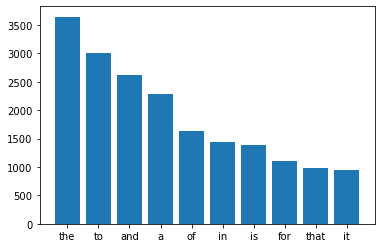

In [30]:
stop=set(stopwords.words('english'))

corpus=[]
new= dotalol['combine'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y);

## Pre-Processing

- Tokenizing
- Remove Stop Words
- Lemmatizing/Stemming
- Remove Punctuations
- Remove Digits

In [31]:
def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens

dotalol['tokenized'] = dotalol['combine'].apply(lambda x: tokenize(x.lower()))

dotalol['tokenized'].head()

0                        [weird, blink, bug, on, pa, ]
1    [ability, draft, appreciation, thread, yeah, t...
2                               [weird, bug, on, pa, ]
3    [battlepass, situation, after, the, reveal, of...
4    [weird, interaction, between, winter, s, curse...
Name: tokenized, dtype: object

In [32]:
def remove_stopwords(txt_tokenized):
    stopwords = nltk.corpus.stopwords.words('english')
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

dotalol['nosw'] = dotalol['tokenized'].apply(lambda x: remove_stopwords(x))

dotalol['nosw'].head()

0                            [weird, blink, bug, pa, ]
1    [ability, draft, appreciation, thread, yeah, t...
2                                   [weird, bug, pa, ]
3    [battlepass, situation, reveal, second, batch,...
4    [weird, interaction, winter, curse, skewer, hu...
Name: nosw, dtype: object

In [33]:
wnl = WordNetLemmatizer()

def Lemmatizing(txt):
    text = [wnl.lemmatize(word) for word in txt]
    return text

dotalol['lemmatized'] = dotalol['nosw'].apply(lambda x: Lemmatizing(x))

dotalol['lemmatized'].head()

0                            [weird, blink, bug, pa, ]
1    [ability, draft, appreciation, thread, yeah, t...
2                                   [weird, bug, pa, ]
3    [battlepass, situation, reveal, second, batch,...
4    [weird, interaction, winter, curse, skewer, hu...
Name: lemmatized, dtype: object

In [34]:
#porter=PorterStemmer()

#def Stemming(txt):
    #text = [porter.stem(word) for word in txt]
    #return text

#dotalol['stemmed'] = dotalol['lemmatized'].apply(lambda x: Stemming(x))

#dotalol['stemmed'].head()

In [36]:
def remove_punctuation(txt):
    txt_nopunt = [c for c in txt if c not in string.punctuation]
    return txt_nopunt

dotalol['nopunc'] = dotalol['lemmatized'].apply(lambda x: remove_punctuation(x))

dotalol['nopunc'].head()

0                              [weird, blink, bug, pa]
1    [ability, draft, appreciation, thread, yeah, t...
2                                     [weird, bug, pa]
3    [battlepass, situation, reveal, second, batch,...
4    [weird, interaction, winter, curse, skewer, hu...
Name: nopunc, dtype: object

In [37]:
def remove_digits(txt):
    text = [x for x in txt if x not in string.digits]
    return text

dotalol['nonum'] = dotalol['nopunc'].apply(lambda x: remove_digits(x))

dotalol['nonum'].head()

0                              [weird, blink, bug, pa]
1    [ability, draft, appreciation, thread, yeah, t...
2                                     [weird, bug, pa]
3    [battlepass, situation, reveal, second, batch,...
4    [weird, interaction, winter, curse, skewer, hu...
Name: nonum, dtype: object

In [38]:
dotalol['nonum'] = dotalol['nonum'].map(lambda x : ' '.join(x))

In [39]:
dotalol['nonum']

0                                      weird blink bug pa
1       ability draft appreciation thread yeah title t...
2                                            weird bug pa
3       battlepass situation reveal second batch weekl...
4       weird interaction winter curse skewer hustler ...
                              ...                        
1995    dota subreddit petition permanently ban people...
1996    happy new year drew boyfriend obsessed drawing...
1997                                              exposed
1998    best cassio na cassiopeia lol montage petrifyi...
1999    le cheater hacker league game played league ye...
Name: nonum, Length: 2000, dtype: object

In [40]:
dotalol['clean'] = dotalol['nonum']

In [41]:
dotalol['clean']

0                                      weird blink bug pa
1       ability draft appreciation thread yeah title t...
2                                            weird bug pa
3       battlepass situation reveal second batch weekl...
4       weird interaction winter curse skewer hustler ...
                              ...                        
1995    dota subreddit petition permanently ban people...
1996    happy new year drew boyfriend obsessed drawing...
1997                                              exposed
1998    best cassio na cassiopeia lol montage petrifyi...
1999    le cheater hacker league game played league ye...
Name: clean, Length: 2000, dtype: object

## Visualizations - Top words that are not Stop Words

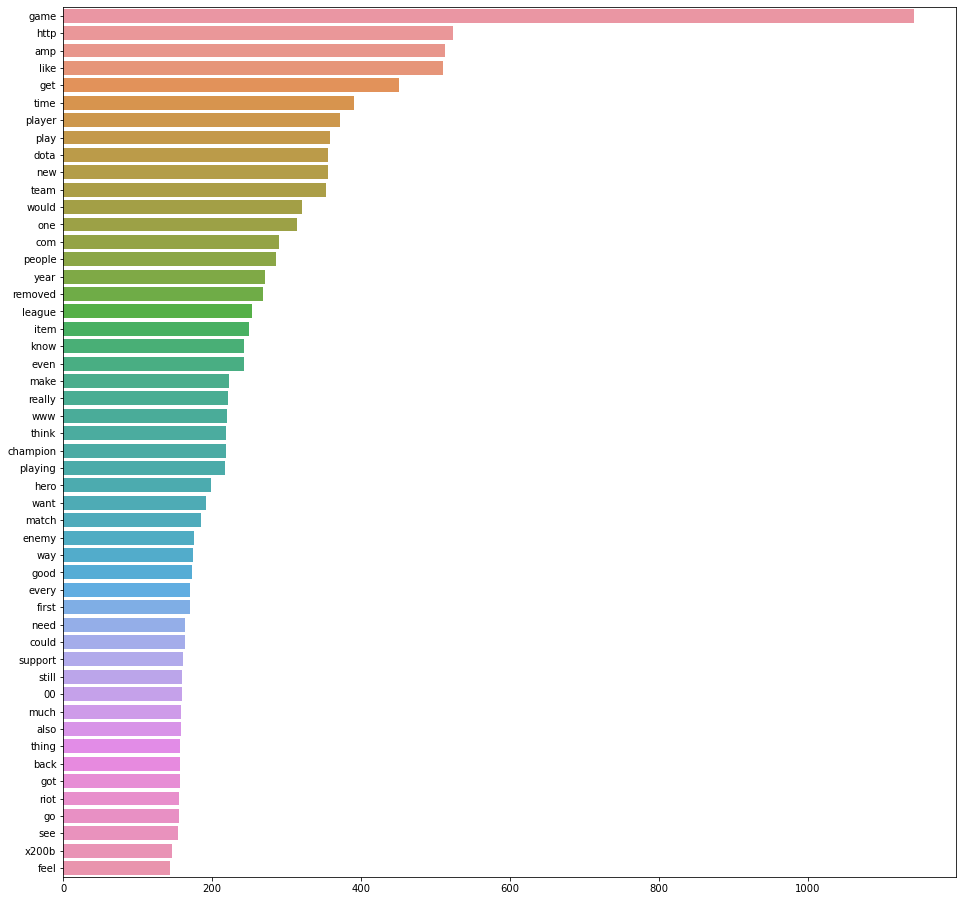

In [42]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)
plt.figure(1, figsize=(16, 16))
plot_top_non_stopwords_barchart(dotalol['clean'])

In [43]:
text = dotalol['clean'][0:2000]

letters_only = re.sub("[^a-zA-Z]"," ",str(text))

## Visualizations - WordCloud

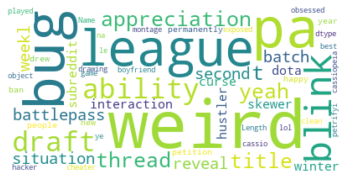

In [44]:
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(letters_only)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(50, 50))
plt.axis("off")
plt.show()

## Visualizations - WordCloud (Removed Unhelpful Words)

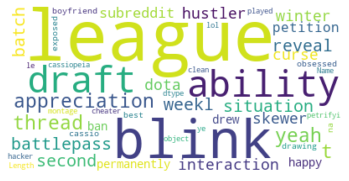

In [45]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['game', 'http','amp','like','get','time','player','new','would','people','removed','know','year','weird','bug','pa','title','www','twitch','format','filler','x200b','http','auto','00','webp','com','amp','redd','png','preview','width','feel','like','want','could'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(letters_only)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(50, 50))
plt.axis("off")
plt.show()

## Visualizations - Top 20 of NGrams (1,2 and 1,3)

In [46]:
from nltk.corpus import stopwords## Visualizations - WordCloud Before

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

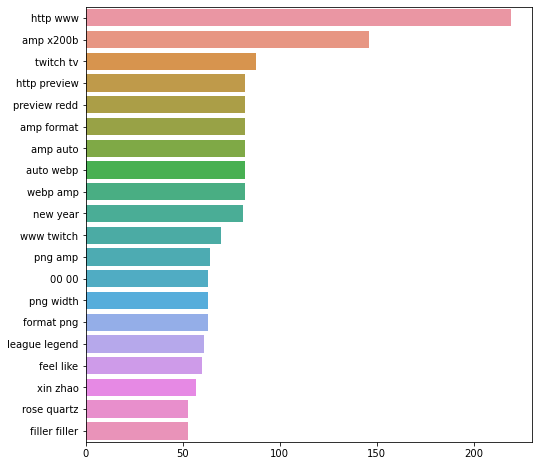

In [47]:
plt.figure(1, figsize=(8, 8))
plot_top_ngrams_barchart(dotalol['clean'],2)

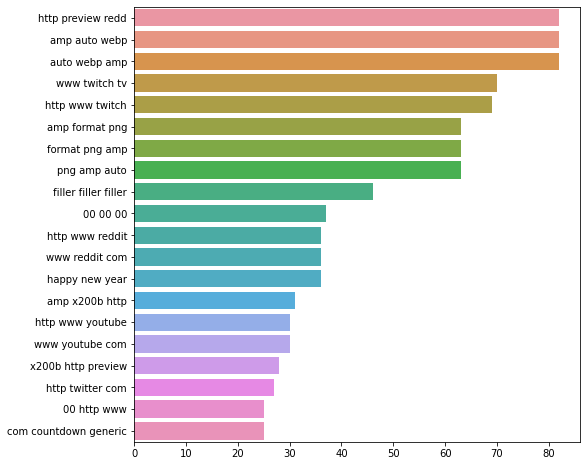

In [48]:
plt.figure(1, figsize=(8, 8))
plot_top_ngrams_barchart(dotalol['clean'],3)

# 3. Modelling

## Model 1 - CountVectorization and Random Forest Classifier

In [1396]:
dotalol['leagueoflegends'] = [1 if dotalol.loc[i,'subreddit'] == 'leagueoflegends' else 0 for i in range(dotalol.shape[0])]

In [1397]:
X = dotalol['clean']
y = dotalol['leagueoflegends']

In [1398]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=25,
                                                    stratify=y)

In [1399]:
other_stopwords = ['game','http','bug','like','get','player','new','would','people','removed','know','year','weird','bug','pa','title','www','twitch','format','filler','x200b','http','auto','00','webp','com','amp','redd','png','preview','width','feel','like','want','could','lol','dota','league','dota2']

pipe = Pipeline([
    ('cvec',CountVectorizer(stop_words = other_stopwords)),
    ('rfc', RandomForestClassifier())
])

In [1400]:
pipe_params = {
    'cvec__max_features': [30000],
    'cvec__min_df': [2],
    'cvec__max_df': [1.0],
    'cvec__ngram_range': [(1,1)],
    'cvec__strip_accents': ['unicode'],
    'cvec__stop_words': ['english'],
    'rfc__bootstrap': [True],
    'rfc__max_depth': [1,2,3,4,5],
    'rfc__max_features': [1000],
    'rfc__min_samples_leaf': [9,10,11,12],
    'rfc__max_leaf_nodes':[5,10,15],
    'rfc__n_estimators': [5,10,15],
    'rfc__criterion': ['gini','entropy']
}

In [1401]:
gs = GridSearchCV(pipe,
                  param_grid=pipe_params,
                  cv=5,
                 n_jobs=-1,
                 verbose=2)

In [1402]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words=['game',
                                                                    'http',
                                                                    'bug',
                                                                    'like',
                                                                    'get',
                                                                    'player',
                                                                    'new',
                                                                    'would',
                                                                    'people',
                                                                    'removed',
                                                                    'know',
                                                                    'year',
                

In [1403]:
gs.best_params_

{'cvec__max_df': 1.0,
 'cvec__max_features': 30000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'cvec__strip_accents': 'unicode',
 'rfc__bootstrap': True,
 'rfc__criterion': 'gini',
 'rfc__max_depth': 5,
 'rfc__max_features': 1000,
 'rfc__max_leaf_nodes': 10,
 'rfc__min_samples_leaf': 12,
 'rfc__n_estimators': 15}

In [1404]:
print('Using Random Forest Classifier with CountVectorizer:')
print('----------------------------------------------------')
print(f'Best Score: {round(gs.best_score_,4)}')
print(f'Train Score: {round(gs.score(X_train, y_train),4)}')
print(f'Test Score: {round(gs.score(X_test,y_test),4)}')

Using Random Forest Classifier with CountVectorizer:
----------------------------------------------------
Best Score: 0.7173
Train Score: 0.7033
Test Score: 0.698


In [1405]:
# Get predictions
preds = gs.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [1406]:
print(classification_report(y_test, preds, target_names=['dota2','leagueoflegends']))

                 precision    recall  f1-score   support

          dota2       0.63      0.94      0.76       250
leagueoflegends       0.89      0.45      0.60       250

       accuracy                           0.70       500
      macro avg       0.76      0.70      0.68       500
   weighted avg       0.76      0.70      0.68       500



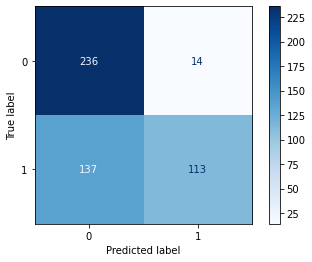

In [1407]:
# View confusion matrix
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', values_format='d');

In [1408]:
spec = tn / (tn + fp)
sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens, 4)}')
print("Accuracy = ", metrics.accuracy_score(y_test, preds))
print(f'Specificity = {round(spec, 4)}')

Sensitivity: 0.452
Accuracy =  0.698
Specificity = 0.944


## Model 2 - TFIDF and Multinomial Naive Bayes

In [1382]:
X = dotalol['clean']
y = dotalol['leagueoflegends']

In [1383]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

In [1384]:
other_stopwords = ['game','http','bug','like','get','player','new','would','people','removed','know','year','weird','bug','pa','title','www','twitch','format','filler','x200b','http','auto','00','webp','com','amp','redd','png','preview','width','feel','like','want','could','lol','dota','league','dota2']

tvec = TfidfVectorizer(stop_words = other_stopwords)

X_train_df = pd.DataFrame(tvec.fit_transform(X_train).todense(), 
                          columns=tvec.get_feature_names())

In [1385]:
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [1386]:
pipe_tvec_params = {
    'tvec__max_features': [1000],
    'tvec__ngram_range': [(1,1),(1,2),(1,3)],
    'tvec__min_df': [2],
    'tvec__max_df': [1.0],
    'tvec__strip_accents': ['unicode'],
    'tvec__stop_words': ['english']
}

In [1387]:
gs_tvec = GridSearchCV(pipe_tvec, # what object are we optimizing?
                        param_grid = pipe_tvec_params, # what parameters values are we searching?
                        cv=5) # 5-fold cross-validation.

In [1388]:
gs_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_df': [1.0], 'tvec__max_features': [1000],
                         'tvec__min_df': [2],
                         'tvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'tvec__stop_words': ['english'],
                         'tvec__strip_accents': ['unicode']})

In [1389]:
print('Using Multinomial Naive Bayes with TfidfVectorizer:')
print('----------------------------------------------------')
print(f'Best Score: {round(gs_tvec.best_score_,4)}')
print(f'Train Score: {round(gs_tvec.score(X_train, y_train),4)}')
print(f'Test Score: {round(gs_tvec.score(X_test,y_test),4)}')

Using Multinomial Naive Bayes with TfidfVectorizer:
----------------------------------------------------
Best Score: 0.81
Train Score: 0.9053
Test Score: 0.812


In [1390]:
# Get predictions
preds_gs_tvec = gs_tvec.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_gs_tvec).ravel()

In [1391]:
print(classification_report(y_test, preds_gs_tvec, target_names=['dota2','leagueoflegends']))

                 precision    recall  f1-score   support

          dota2       0.79      0.85      0.82       250
leagueoflegends       0.84      0.78      0.80       250

       accuracy                           0.81       500
      macro avg       0.81      0.81      0.81       500
   weighted avg       0.81      0.81      0.81       500



In [1392]:
# Generate a confusion matrix.
confusion_matrix(y_test, preds_gs_tvec)

array([[212,  38],
       [ 56, 194]], dtype=int64)

In [1393]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 212
False Positives: 38
False Negatives: 56
True Positives: 194


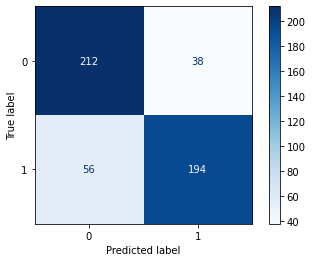

In [1394]:
plot_confusion_matrix(gs_tvec, X_test, y_test, cmap='Blues', values_format='d');

In [1395]:
# Calculate the specificity

spec = tn / (tn + fp)

# Calculate sensitivity.

sens = tp / (tp + fn)

print('Specificity:', spec)
print(f'Sensitivity: {round(sens, 4)}')
print("Accuracy = ", metrics.accuracy_score(y_test, preds_gs_tvec))

Specificity: 0.848
Sensitivity: 0.776
Accuracy =  0.812


# 4. Evaluation and Conceptual Understanding

- Model 1: Random Forest Classifier with CountVectorizer
- Model 2: Multinomial Naive Bayes with TfidfVectorizer

#### Precision:
- Model 1 was more accurate in its positive predictions for leagueoflegend posts

#### Recall:
- Model 1 had a higher percentage in positive predictions for Dota2

#### F1 Score:
- Model 1 had a higher percentage in positive predictions that were correct for Dota2

In [75]:
# Set up a dataframe for the test data, with the actual target and the predicted target.

prediction_df = pd.DataFrame({
    'X_test': X_test,
    'y_test': y_test,
    'y_pred': preds
})

In [76]:
# Explore dota2 posts that are incorrectly predicted to leagueoflegends

for i in prediction_df[(prediction_df.y_test - prediction_df.y_pred) == -1]['X_test']:
    print(i)
    print('-'*125)

ruined life playing literally removed
-----------------------------------------------------------------------------------------------------------------------------
life pretty much
-----------------------------------------------------------------------------------------------------------------------------
dip toe back long story short last match dota real human being 2015 get wrong try bot match two every time release new hero familiar enough map hero item change thought hopping right back daunting try hand couple turbo match bite bullet hit unranked
-----------------------------------------------------------------------------------------------------------------------------
hi question question pro typing gg tournament throne automatically destroyed system detect word gg make throne destroyed admin power make throne destroyed thinking throne could automatically destroyed even though every player team disconnected thank
-------------------------------------------------------------------

In [77]:
# Explore leagueoflegends posts that are incorrectly predicted to dota2

for i in prediction_df[(prediction_df.y_test - prediction_df.y_pred) == 1]['X_test']:
    print(i)
    print('-'*150)

kassadin ban rate low played league looking stats op gg noticed kassadin ban rate super low happened used super high ban rate right
------------------------------------------------------------------------------------------------------------------------------------------------------
silver thresh pretty proud flay
------------------------------------------------------------------------------------------------------------------------------------------------------
champ select player actually game player kept asking go mid despite fact actually game enemy team either idea happened exactly confused af lol amp x200b http preview redd sp7gno7dffw61 png width 370 amp format png amp auto webp amp 4d8d0813c377af76c20e076bc6ad2e93b1b280c5
------------------------------------------------------------------------------------------------------------------------------------------------------
good tried whatnot sign link get first collectable purchase whatnot com invite shanhatch76
-------------------

Comments on noth sets of incorrectly predicted posts:

1. There seems to be a some aggressive lemmatisation and stemming which incorectly spell out the words like "jungl" instead of "jungle" and "someth" instead of "something" that I need to adjust in the future.
2. The classifier was unable to associate dotabuff to dota2
3. The classifier was unable to associate riot, the developer of the game to league of legends

# 5. Conclusion and Recommendations

The Random Forest with CountVectorizer worked fairly well with an accuracy score of 74%.
The Multinomial Naive Bayes with TfidfVectorizer worked well as well although it garnered a lower accuracy score of 72%.

The results that we obtained are decent even though both subreddits were fairly similar. However, we can improve our models by including the following:

1. Consider combining misspelled or alternately spelled words to a single representation (e.g. “cool”/”kewl”/”cooool”)
2. Consider lemmatization (reduce words such as “am”, “are”, and “is” to a common form such as “be”)
3. Tuning of parameters for random forest to get a better score.
4. Consider either boosting or bagging to get a more optimal outcome.